In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import numpy as np
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

In [2]:
PATH2EXR = "C:\Src\images\LuminanceChroma\Flowers.exr"
img = cv2.imread(PATH2EXR, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
'''
you might have to disable following flags, if you are reading a semantic map/label then because it will convert it into binary map so check both lines and see what you need
''' 
# img = cv2.imread(PATH2EXR) 
 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.max()

8.373413

In [4]:
img.min()

-0.06057994

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


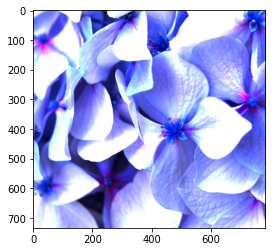

In [5]:
plt.imshow(img)

In [6]:
if(img.min() < 0):
    img = img + img.min()
img /= np.sqrt(np.sum(np.multiply(img,img), axis=(2,))).max()

In [7]:
bwimg = np.sqrt(np.sum(np.multiply(img,img), axis=(2,)))
bwimg.max()

1.0

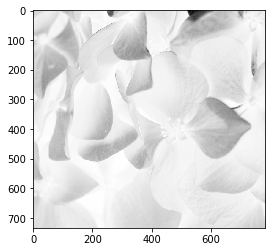

In [8]:
plt.imshow(bwimg,interpolation='none', cmap="Greys")

In [9]:
# convert to 8 bit image
temp = bwimg * 255
bwimgint = temp.astype(np.uint8)
temp.max()
#plt.imshow(bwimgint,interpolation='none', cmap="Greys")


255.0

In [10]:
sortedimg = []
w = bwimgint.shape[0]
h = bwimgint.shape[1]
totalPixVal = np.sum(bwimgint)
avePixVal = totalPixVal/(w*h)
for i in range(w):
    for j in range(h):
        sortedimg.append([i,j,bwimgint[i][j]])
sortedimg.sort(key = lambda sortedimg: sortedimg[2])

In [11]:
sortedimg

[[0, 239, 1],
 [0, 240, 1],
 [1, 240, 1],
 [1, 241, 1],
 [7, 329, 1],
 [9, 325, 1],
 [11, 320, 1],
 [11, 321, 1],
 [12, 319, 1],
 [15, 312, 1],
 [15, 313, 1],
 [16, 311, 1],
 [19, 328, 1],
 [19, 329, 1],
 [21, 327, 1],
 [103, 394, 1],
 [104, 395, 1],
 [108, 394, 1],
 [109, 394, 1],
 [433, 45, 1],
 [434, 43, 1],
 [434, 45, 1],
 [434, 46, 1],
 [434, 47, 1],
 [434, 48, 1],
 [435, 45, 1],
 [435, 47, 1],
 [435, 48, 1],
 [435, 49, 1],
 [436, 45, 1],
 [436, 46, 1],
 [436, 47, 1],
 [436, 48, 1],
 [436, 49, 1],
 [436, 51, 1],
 [437, 49, 1],
 [473, 299, 1],
 [488, 289, 1],
 [488, 294, 1],
 [489, 288, 1],
 [489, 289, 1],
 [490, 287, 1],
 [490, 288, 1],
 [490, 289, 1],
 [491, 286, 1],
 [491, 287, 1],
 [491, 289, 1],
 [492, 284, 1],
 [492, 285, 1],
 [492, 286, 1],
 [492, 287, 1],
 [492, 288, 1],
 [492, 289, 1],
 [492, 290, 1],
 [492, 292, 1],
 [493, 284, 1],
 [493, 285, 1],
 [493, 286, 1],
 [493, 287, 1],
 [493, 288, 1],
 [493, 289, 1],
 [493, 290, 1],
 [493, 291, 1],
 [493, 292, 1],
 [493, 293, 1]

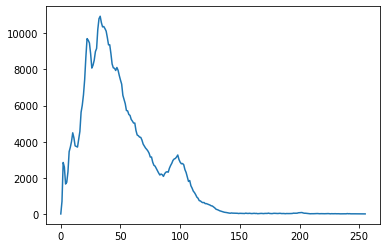

In [12]:
hist = np.zeros([256])
for pixel in sortedimg:
    hist[pixel[2]] += 1
plt.plot(hist)

In [13]:
eqAmount = int(np.ceil(h*w/256))
eqAmount

2248

In [14]:
sortedimgarr = np.array(sortedimg)
for i in range(0,256):
    sortedimgarr[i*eqAmount:(i+1)*eqAmount,2] = i
    #print(sortedimg[i*eqAmount:(i+1)*eqAmount,2])

In [15]:
sortedimg

[[0, 239, 1],
 [0, 240, 1],
 [1, 240, 1],
 [1, 241, 1],
 [7, 329, 1],
 [9, 325, 1],
 [11, 320, 1],
 [11, 321, 1],
 [12, 319, 1],
 [15, 312, 1],
 [15, 313, 1],
 [16, 311, 1],
 [19, 328, 1],
 [19, 329, 1],
 [21, 327, 1],
 [103, 394, 1],
 [104, 395, 1],
 [108, 394, 1],
 [109, 394, 1],
 [433, 45, 1],
 [434, 43, 1],
 [434, 45, 1],
 [434, 46, 1],
 [434, 47, 1],
 [434, 48, 1],
 [435, 45, 1],
 [435, 47, 1],
 [435, 48, 1],
 [435, 49, 1],
 [436, 45, 1],
 [436, 46, 1],
 [436, 47, 1],
 [436, 48, 1],
 [436, 49, 1],
 [436, 51, 1],
 [437, 49, 1],
 [473, 299, 1],
 [488, 289, 1],
 [488, 294, 1],
 [489, 288, 1],
 [489, 289, 1],
 [490, 287, 1],
 [490, 288, 1],
 [490, 289, 1],
 [491, 286, 1],
 [491, 287, 1],
 [491, 289, 1],
 [492, 284, 1],
 [492, 285, 1],
 [492, 286, 1],
 [492, 287, 1],
 [492, 288, 1],
 [492, 289, 1],
 [492, 290, 1],
 [492, 292, 1],
 [493, 284, 1],
 [493, 285, 1],
 [493, 286, 1],
 [493, 287, 1],
 [493, 288, 1],
 [493, 289, 1],
 [493, 290, 1],
 [493, 291, 1],
 [493, 292, 1],
 [493, 293, 1]

2248.0

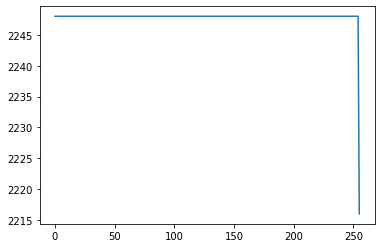

In [16]:
newhist = np.zeros([256])
for pixel in sortedimgarr:
    newhist[pixel[2]] += 1
plt.plot(newhist)
newhist[0]


In [17]:
newimg = np.zeros([w,h])
for pix in sortedimgarr:
    newimg[pix[0],pix[1]] = pix[2]

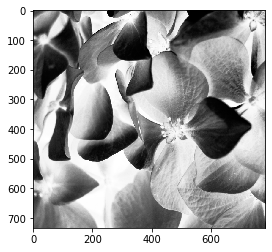

In [18]:
plt.imshow(newimg,interpolation='none', cmap="Greys")

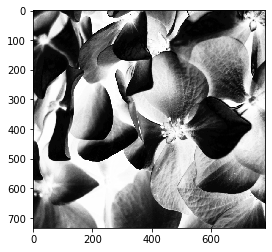

In [19]:
diff = np.abs(newimg-bwimgint)
#diff /= diff.max()
plt.imshow(diff,interpolation='none', cmap="Greys")

In [20]:
diff

array([[129., 130., 130., ...,  50.,  37.,  22.],
       [130., 130., 131., ...,  37.,  19.,   7.],
       [131., 131., 131., ...,  34.,  19.,  13.],
       ...,
       [113., 115., 116., ..., 134., 134., 135.],
       [116., 116., 118., ..., 134., 134., 135.],
       [116., 116., 119., ..., 134., 135., 135.]])

(575456,)


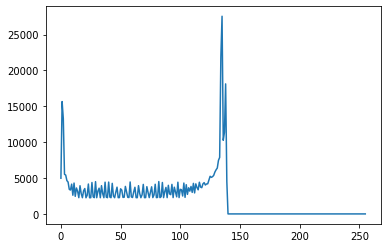

In [21]:
diffhist = np.zeros([256])
diff = diff.reshape(w*h)
print(diff.shape)
for pixel in diff:
    diffhist[int(pixel)] += 1
plt.plot(diffhist)

In [22]:
imageintegral = bwimgint.sum()
imageintegral

28265104

In [43]:
#lets try to do a gaussian
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

vals = 255*gaussian(np.linspace(0,1,256),0.5,0.7/math.sqrt(2*math.pi))
vals *= w*h/vals.sum()

In [44]:
base = 0
sortedimgarr = np.array(sortedimg)
for i in range(0,256):
    r = int(vals[i])
    sortedimgarr[base:base + r,2] = i
    base += r
    #print(sortedimg[i*eqAmount:(i+1)*eqAmount,2])

In [45]:
newimggauss = np.zeros([w,h])
for pix in sortedimgarr:
    #print(pix)
    newimggauss[pix[0],pix[1]] = pix[2]

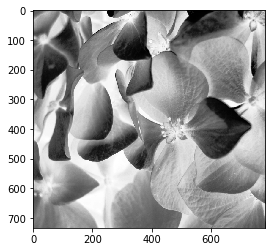

In [46]:
plt.imshow(newimggauss,interpolation='none', cmap="Greys")

699.0

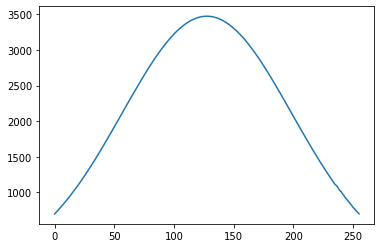

In [47]:
newhist = np.zeros([256])
for pixel in sortedimgarr:
    newhist[pixel[2]] += 1
plt.plot(newhist)
newhist[0]

699.0

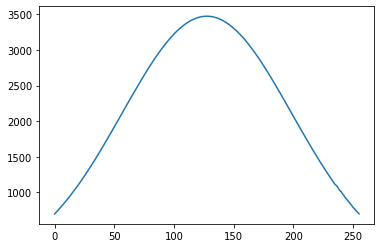

In [48]:
newhist = np.zeros([256])
vals = np.reshape(newimggauss, w*h)
for pixel in vals:
    newhist[int(pixel)] += 1
plt.plot(newhist)
newhist[0]